In [1]:
import numpy as np
import os
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt
import loading_data as ld
import visualizing_funcs as vf
import calculations as calc
import storage_management as sm
from PIL import Image
from constants import *
from settings import *

In [2]:
#Find file with all data
filename = data_files_path + "/All_data_3D_temperature_17_dist_bins_nside_128.hdf5"

In [3]:
#Make new directories to store images

#This directory will contain images/files from this notebook
flagged_properties_path = image_path + '/Flagged_Properties' 
os.makedirs(flagged_properties_path, exist_ok=True)

#Make directory for images of high density regions
density_path = sm.join_path(flagged_properties_path, 'Density')

#Make directory for flagged regions based on temperature
temp_path = sm.join_path(flagged_properties_path, 'Temperature')

Directory  /fs/lustre/cita/molinaca/Images/Flagged_Properties/Density  already exists.
Directory  /fs/lustre/cita/molinaca/Images/Flagged_Properties/Temperature  already exists.


In [4]:
#Load data from file
data_dict = ld.load_3D_temperature_data(filename)

#define needed variables for later
dEBV = data_dict['dEBV']
nside = hp.get_nside(dEBV[0])
Ts = data_dict['temperatures']
n_distslices = data_dict['nr_of_distance_bins']
distslices = data_dict['distance_slices']




## Density
Flagging high density regions

In [5]:
#Get dEBV and clip negative values
dEBV = np.clip(dEBV, 0, None)

In [6]:
#Plot dEBV
#vf.plot_dEBV(data_dict)

In [7]:
#Just plot high density pixels, just for visualizing

# primary_threshold = 0.7

# for ds_index in range(n_distslices):
#     # Create an array that is True when density is above threshold, False otherwise
    
#     binary_mask = dEBV[ds_index] > primary_threshold
    
#     # Create an empty map for high-density regions
#     high_density_map = np.zeros_like(dEBV[ds_index])
    
#     # Make locations where binary mask is True have the value of dEBV, otherwise 0 (from intialization)
#     high_density_map[binary_mask] = dEBV[ds_index][binary_mask]
    
#     # Visualize the high-density regions
#     hp.mollview(high_density_map, title=f'High density regions slice {ds_index}', nest=True, cbar=True)
#     plt.show()

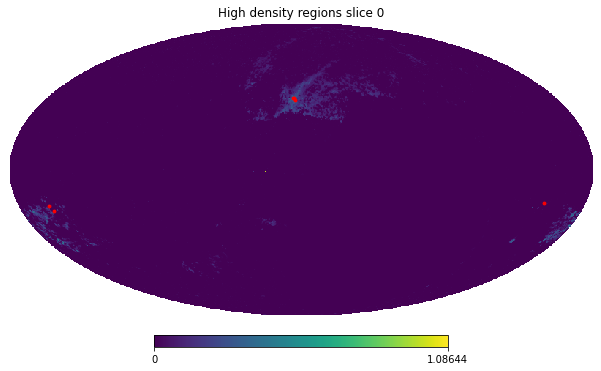

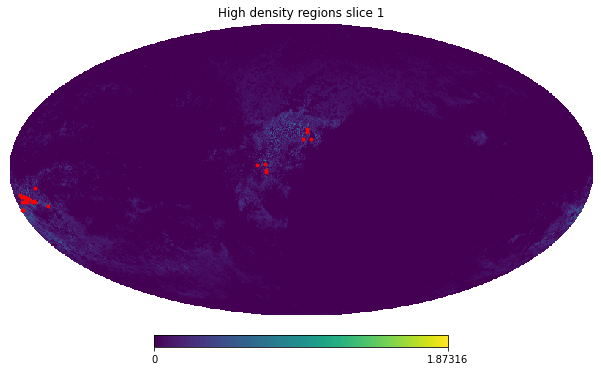

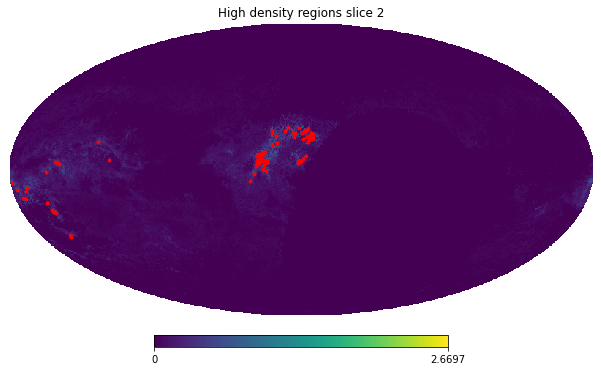

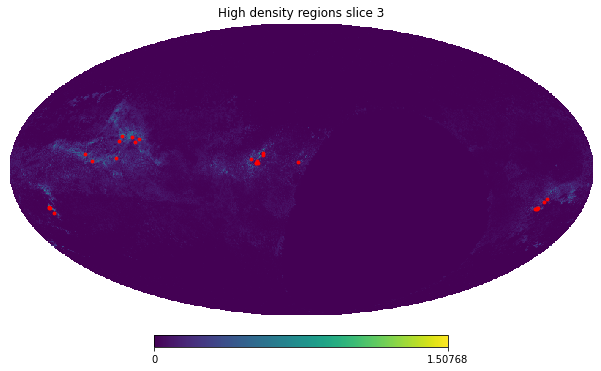

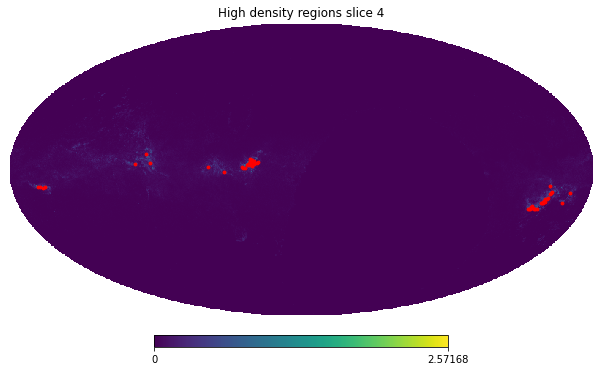

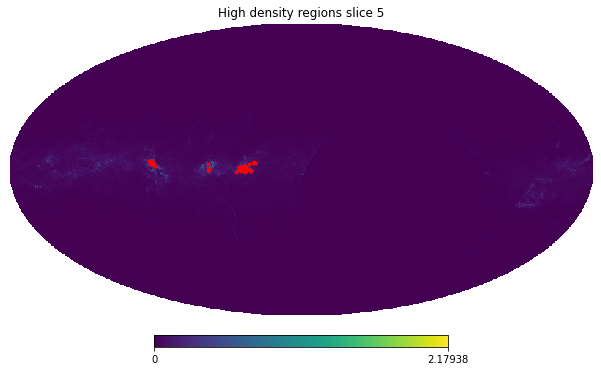

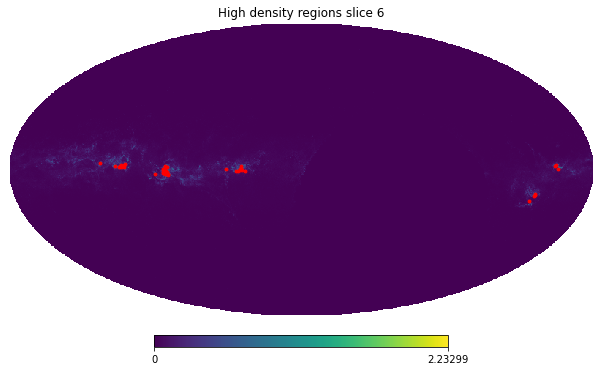

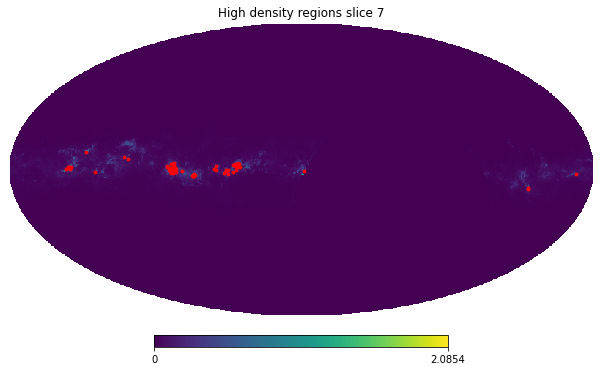

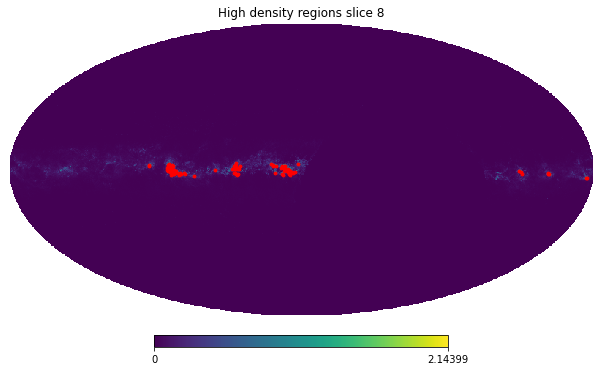

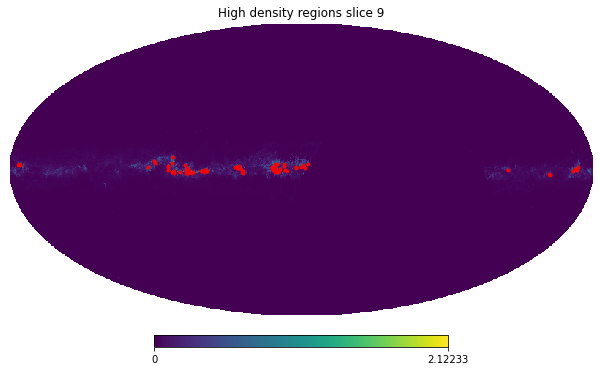

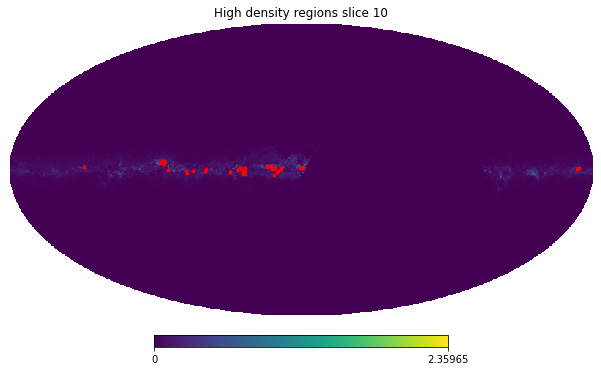

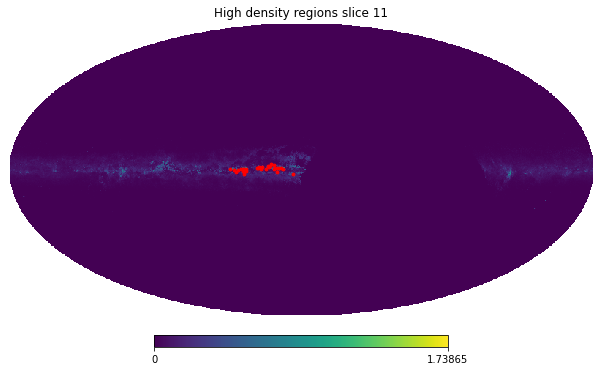

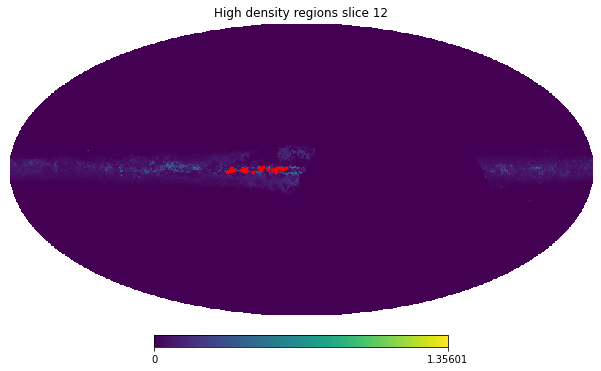

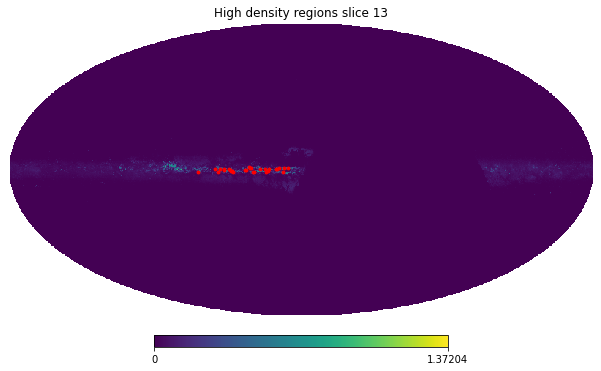

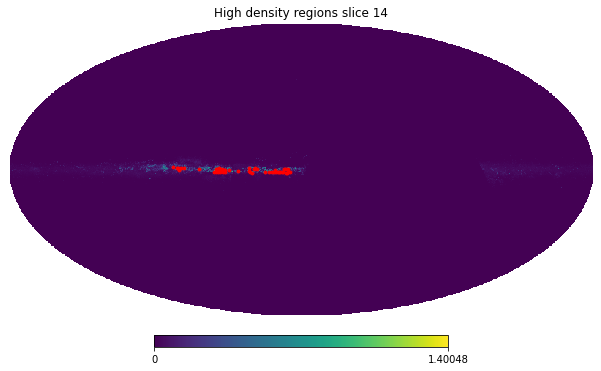

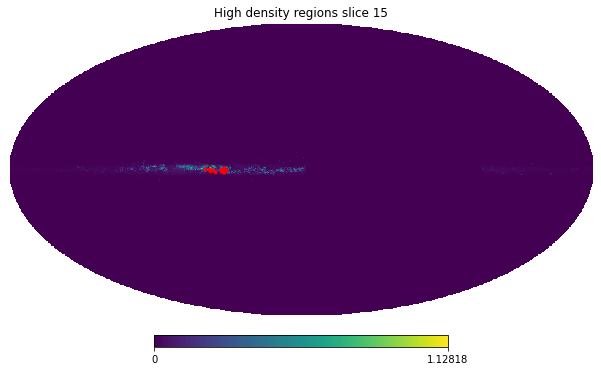

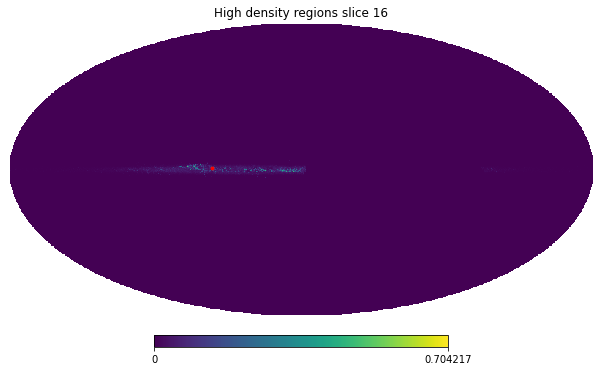

In [8]:
#Instead of pixels get high density regions so that they can be marked on map

dEBV_primary_threshold = 1 #threshold for "high density"
dEBV_secondary_threshold = 0.5 #threshold for "medium density", would be in same region
dEBV_radius = 0.6 #radius around high density region to be considered as part of it

#Get high density regions
highdEBV_info, highdEBV_maps = calc.flag_regions(nside, n_distslices, dEBV, dEBV_primary_threshold, dEBV_secondary_threshold, dEBV_radius)

#Plot region centers over regular dEBV map
vf.overplot_regions_mollview(highdEBV_info, dEBV, n_distslices)

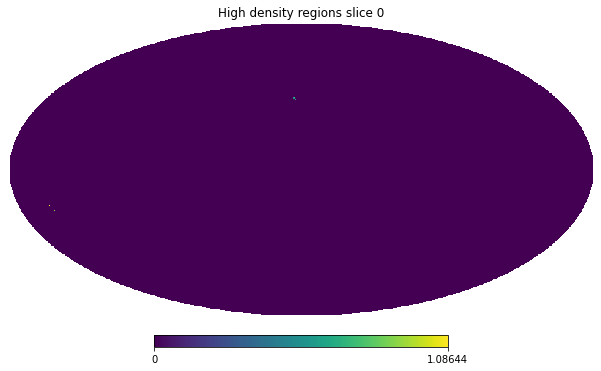

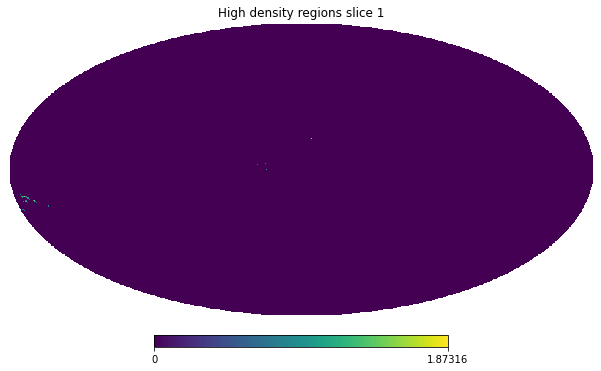

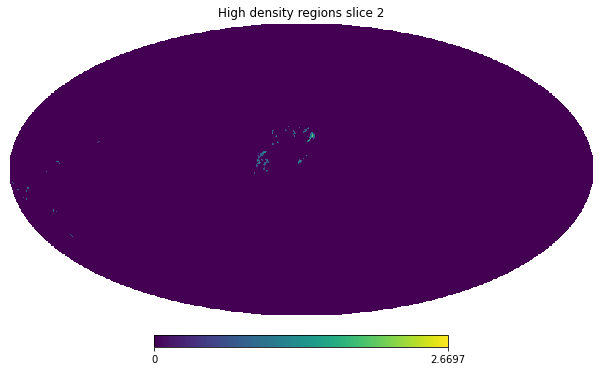

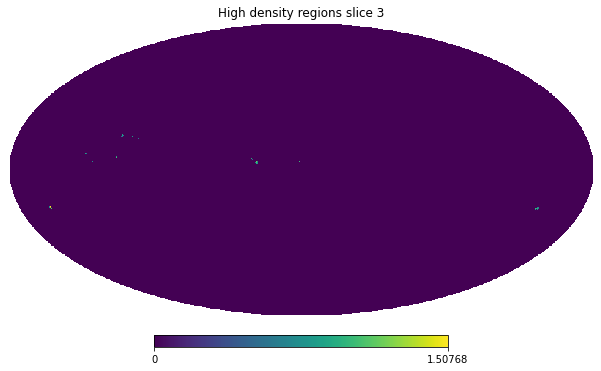

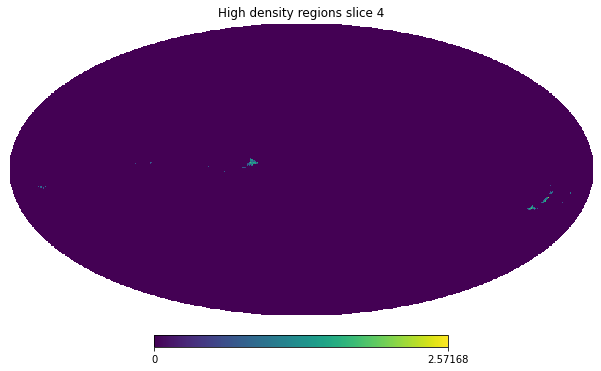

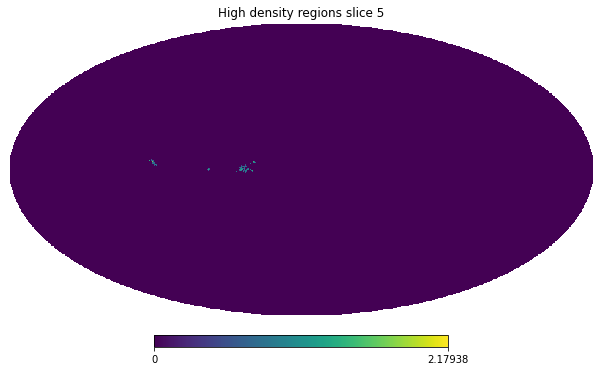

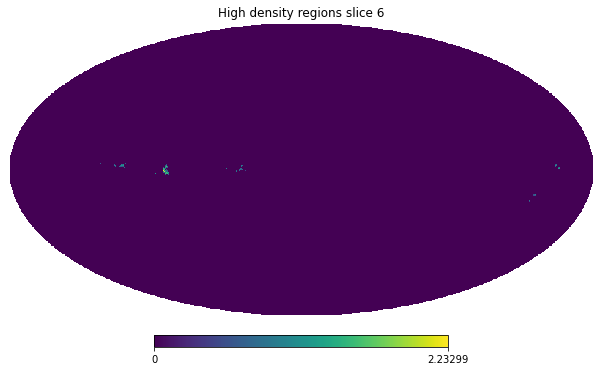

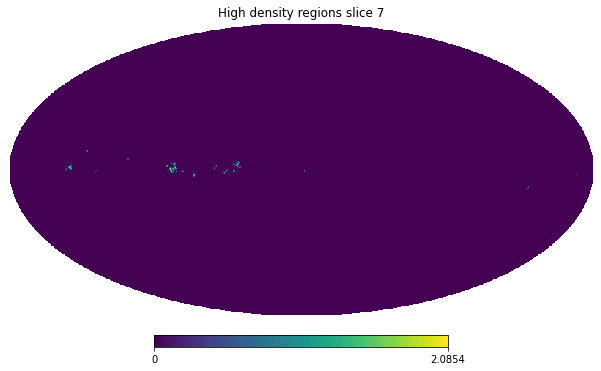

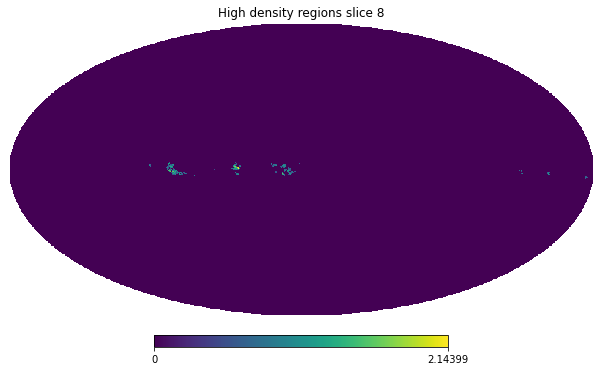

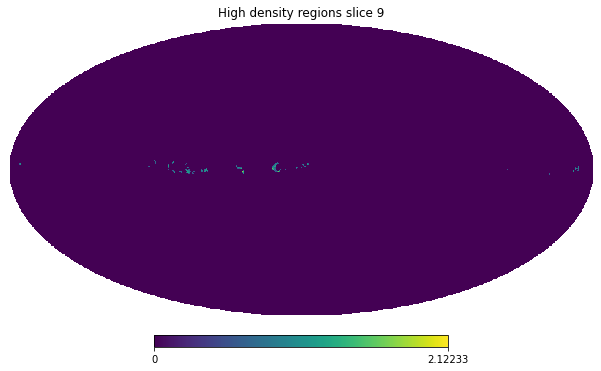

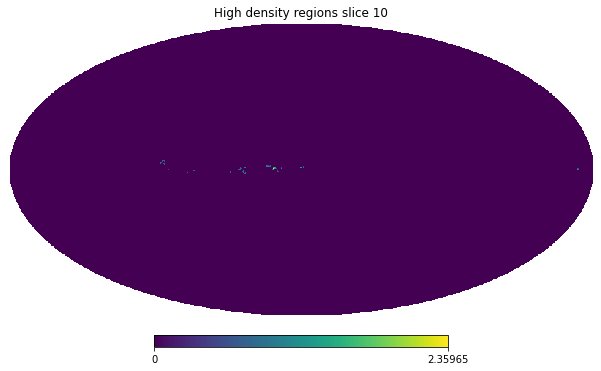

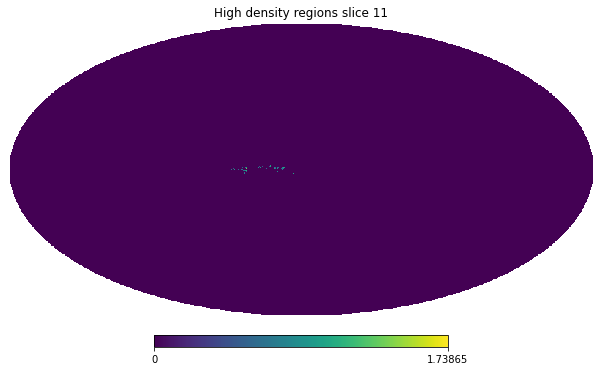

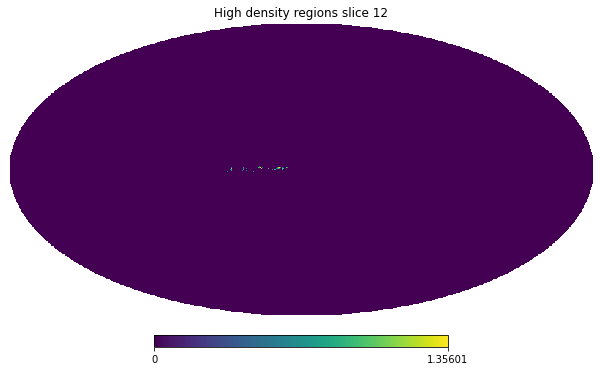

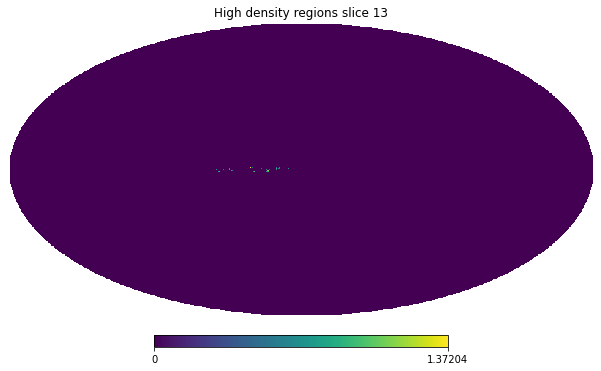

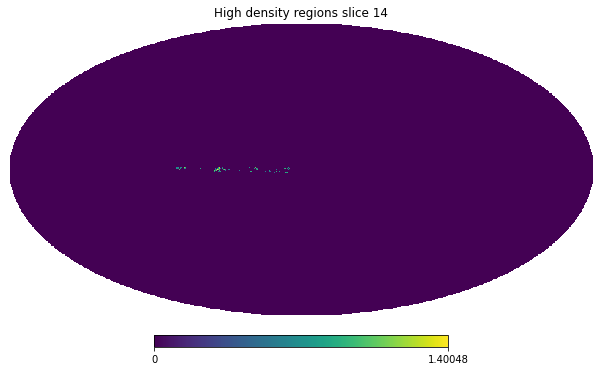

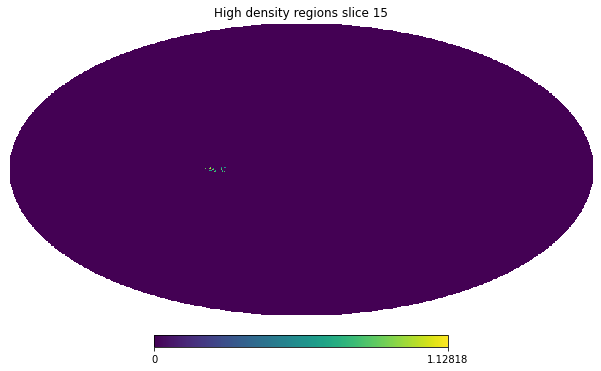

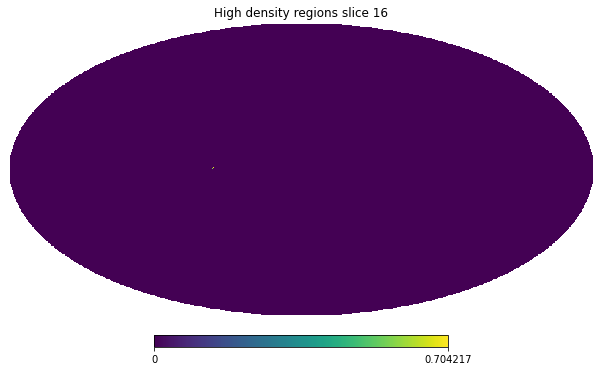

In [9]:
#Plot high density regions 
for ds_index in range(n_distslices):
    hp.mollview(highdEBV_maps[ds_index], title=f'High density regions slice {ds_index}', nest=True, cbar=True)

In [10]:
#Checking number of regions in each distance slice
for ds_index in range(n_distslices):
    print(f"Number of regions in slice {ds_index}: {len(highdEBV_info[ds_index])}")

Number of regions in slice 0: 6
Number of regions in slice 1: 28
Number of regions in slice 2: 94
Number of regions in slice 3: 27
Number of regions in slice 4: 61
Number of regions in slice 5: 38
Number of regions in slice 6: 46
Number of regions in slice 7: 64
Number of regions in slice 8: 93
Number of regions in slice 9: 75
Number of regions in slice 10: 40
Number of regions in slice 11: 33
Number of regions in slice 12: 27
Number of regions in slice 13: 29
Number of regions in slice 14: 52
Number of regions in slice 15: 12
Number of regions in slice 16: 1


In [11]:
#Look at region centers compared to the dEBV of each molecular cloud

vf.overplot_region_gnomview(highdEBV_info, dEBV, d_orion, rot=[l_orionA,b_orionA], title=f'High density regions in Orion A at' + ' {:.2f}'.format(distslices[d_orion]) + 'kpc', filename=density_path + '/OrionA.png', unit='dEBV')
vf.overplot_region_gnomview(highdEBV_info, dEBV, d_orion, rot=[l_orionB,b_orionB], title=f'High density regions in Orion B at' + ' {:.2f}'.format(distslices[d_orion]) + 'kpc', filename=density_path + '/OrionB.png', unit='dEBV')
vf.overplot_region_gnomview(highdEBV_info, dEBV, d_ceph, rot=[l_ceph,b_ceph], title=f'High density regions in Cepheus at' + ' {:.2f}'.format(distslices[d_ceph]) + 'kpc', filename=density_path + '/Cepheus.png', unit='dEBV')
vf.overplot_region_gnomview(highdEBV_info, dEBV, d_perseus, rot=[l_perseus,b_perseus], title=f'High density regions in Perseus at' + ' {:.2f}'.format(distslices[d_perseus]) + 'kpc', filename=density_path + '/Perseus.png', unit='dEBV')


In [12]:
#Take a look at what the regions maps look like on their own

#Orion A and B
hp.gnomview(highdEBV_maps[d_orion], rot=[l_orionA, b_orionA], nest=True, title='High Density Region Maps of Orion A at'+' {:.2f}'.format(distslices[d_orion]) + 'kpc', cbar=True, notext=True, unit='dEBV')
plt.savefig(density_path + '/OrionA_map.png')
plt.close()

hp.gnomview(highdEBV_maps[d_orion], rot=[l_orionB, b_orionB], nest=True, title=f'High Density Region Maps of Orion B at' + ' {:.2f}'.format(distslices[d_orion]) + 'kpc' , cbar=True, notext=True, unit='dEBV')
plt.savefig(density_path + '/OrionB_map.png')
plt.close()

#Cepheus
hp.gnomview(highdEBV_maps[d_ceph], rot=[l_ceph, b_ceph], nest=True, title=f'High Density Region Maps of Cepheus at' + ' {:.2f}'.format(distslices[d_ceph]) + 'kpc', cbar=True, notext=True, unit='dEBV')
plt.savefig(density_path + '/Cepheus_map.png')
plt.close()

#Perseus
hp.gnomview(highdEBV_maps[d_perseus], rot=[l_perseus, b_perseus], nest=True, title=f'High Density Region Maps of Perseus at' + ' {:.2f}'.format(distslices[d_perseus]) + 'kpc', cbar=True, notext=True, unit='dEBV')
plt.savefig(density_path + '/Perseus_map.png')
plt.close()


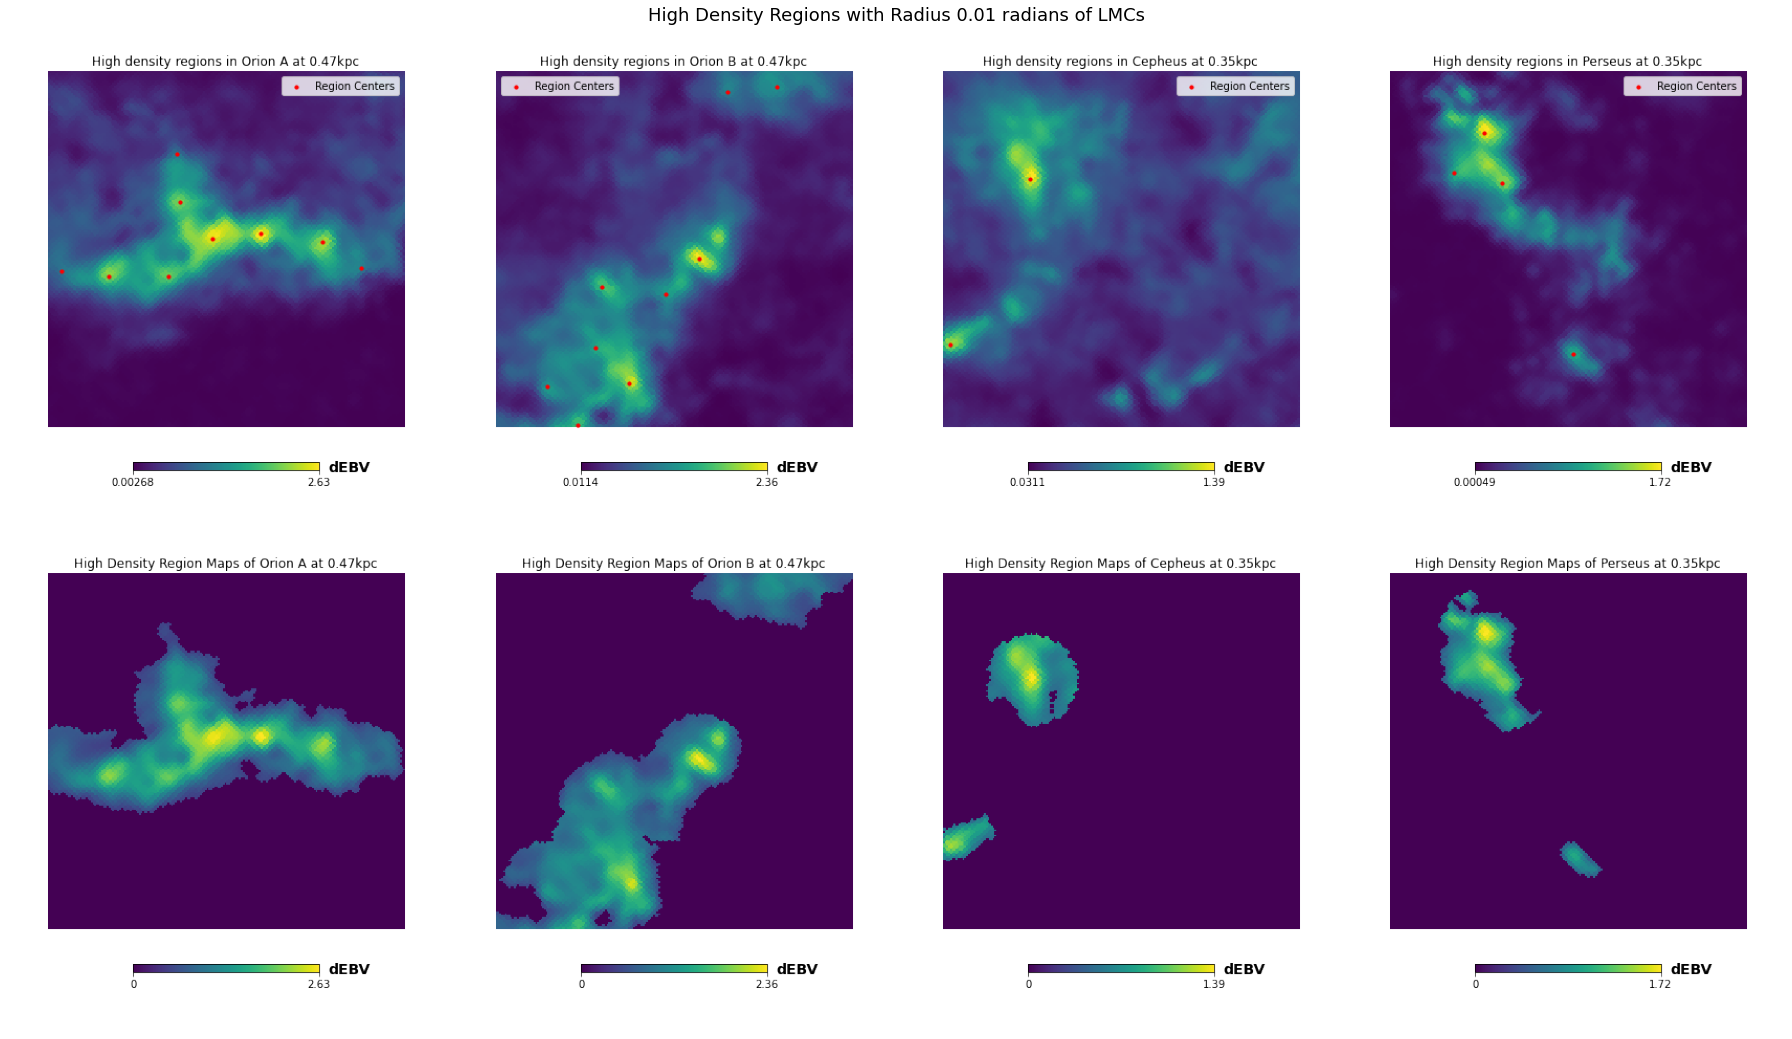

In [13]:
dEBV_imgs = ['OrionA', 'OrionB', 'Cepheus', 'Perseus', 'OrionA_map', 'OrionB_map', 'Cepheus_map', 'Perseus_map']
dEBV_panel_save = density_path + '/HighdEBV_panel.png'
vf.create_panel([2,4], (25,15), density_path, dEBV_imgs, 'High Density Regions with Radius ' + '{:.2f}'.format(np.radians(dEBV_radius)) + ' radians of LMCs', filename = dEBV_panel_save)

In [14]:
#Can use this to filter regions but not really necessary
#orion_regions, orion_regions_all = calc.get_region_maps(region_info, nside, d_orion, filter=True, rot=[l_orionA, b_orionA], radius = 0.2, combine=True)
#hp.mollview(orion_regions_all, title='Orion A Region', nest=True, cbar=True)

## Temperature

In [15]:
#Want to work with dens x temp because should only be looking at regions with dust anyways

Ts_new = calc.increase_temp_res(data_dict, 1024)
pixels = len(Ts_new[0]) #Get number of pixels


In [16]:
#Get RGB channels

T = [10, 18.8, 30]
frequency = np.zeros(3)

for i in range(len(T)):
    frequency[i] = calc.WiensLaw(T[i])

sigma_G = 2
windowed_T = np.zeros((n_distslices, len(frequency), len(Ts_new[0])))

for ds_index in range(n_distslices):
    windowed_T[ds_index] = calc.get_temptracers_at_freq(Ts_new[ds_index], method='gauss', midpoints = T, sigma_G=sigma_G)

windowed_T = np.transpose(windowed_T, (1,0,2))

#If want to use stepfun: windowed_T = calc.get_temptracers_at_freq(Ts_new, method='step', limits = [16,19])

dens_ttracer = calc.multiply_dEBVandTtracer(data_dict, dEBV, windowed_T, frequency)
dens_ttracer_norm = calc.normalize_multiplied_array(data_dict, dens_ttracer, frequency)
R, G, B = calc.get_RGB(dens_ttracer_norm)

brightness_factor = 5
R, G, B = vf.brighten_image(R, brightness_factor), vf.brighten_image(G, brightness_factor), vf.brighten_image(B, brightness_factor)


In [17]:
#Get RGB images of Orion A and B

R_orionA, G_orionA, B_orionA, RGB_orionA = vf.get_region_image(R, G, B, d_orion, l_orionA, b_orionA, 200, 200, scale=True)
RGB_orionA.save(temp_path + '/OrionA_RGB.png')

R_orionB, G_orionB, B_orionB, RGB_orionB = vf.get_region_image(R, G, B, d_orion, l_orionB, b_orionB, 200, 200, scale=True)
RGB_orionB.save(temp_path + '/OrionB_RGB.png')


In [18]:
#Get region centers high in R and B
blue_region_info, blue_region_maps = calc.flag_regions(nside, n_distslices, B, 180, 80, 0.8)
red_region_info, red_region_maps = calc.flag_regions(nside, n_distslices, R, 180, 80, 0.8)


vf.overplot_region_gnomview(blue_region_info, B, d_orion, rot=[l_orionA,b_orionA], title='High Temperature Regions in Orion A ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc', filename=temp_path + '/OrionA_blue.png', unit='B')

#Code to plot B over dEBV: vf.overplot_region_gnomview(blue_region_info, dEBV, d_orion, rot=[l_orionA,b_orionA], title='High blue regions in Orion A', filename=temp_path + '/OrionA_blue_dEBV.png', unit='dEBV')


vf.overplot_region_gnomview(red_region_info, R, d_orion, rot=[l_orionA,b_orionA], title='Low Temperature Regions in Orion B' + ' {:.2f}'.format(distslices[d_orion]) + 'kpc', filename=temp_path + '/OrionA_red.png', unit='R')
#Code to plot R over dEBV: vf.overplot_region_gnomview(red_region_info, dEBV, d_orion, rot=[l_orionA,b_orionA], title='High red regions in Orion B', filename=temp_path + '/OrionA_red_dEBV.png', unit='dEBV')

In [20]:
#Plot both R and B over Ts_new and dEBV

#Get centers of regions, and find close R and B regions

distance_threshold = 0.01 #threshold for close regions

blue_centers = []
red_centers = []
close_RandB = []

for ds_index in range(n_distslices):
    blue_centers_atdist = np.array([region['center'] for region in blue_region_info[ds_index]])
    red_centers_atdist = np.array([region['center'] for region in red_region_info[ds_index]])
    blue_centers.append(blue_centers_atdist)
    red_centers.append(red_centers_atdist)

    close_RandB_atdist = calc.find_close_RandB(blue_centers_atdist, red_centers_atdist, distance_threshold)
    close_RandB.append(close_RandB_atdist)

hp.gnomview(dEBV[d_orion], rot=[l_orionA, b_orionA], xsize=200, ysize=200, nest=True, title='R & B Regions in dEBV Map of Orion A ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc', cbar=True, notext=True, unit='dEBV')
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', marker='o', s=10)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', marker='o', s=10)
plt.legend(['B', 'R'])
plt.savefig(temp_path + '/OrionA_R&B.png')
plt.close()

hp.gnomview(Ts_new[d_orion], rot=[l_orionA, b_orionA], xsize=200, ysize=200, nest=True, title='R & B Regions in $T$ map of Orion A ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc', cbar=True, notext=True, unit='K')
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', marker='o', s=10)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', marker='o', s=10)
plt.legend(['B', 'R'])
plt.savefig(temp_path + '/OrionA_R&B_temp.png')
plt.close()

In [21]:
hp.gnomview(dEBV[d_orion], rot=[l_orionA, b_orionA], xsize=200, ysize=200, nest=True, title='Regions with Close R & B in Orion A ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc', cbar=True, notext=True, unit='dEBV')
hp.projscatter(close_RandB[d_orion][:,0], close_RandB[d_orion][:,1], c='red', marker='o', s=15)
plt.savefig(temp_path + '/OrionA_bothR&B.png')
plt.close()

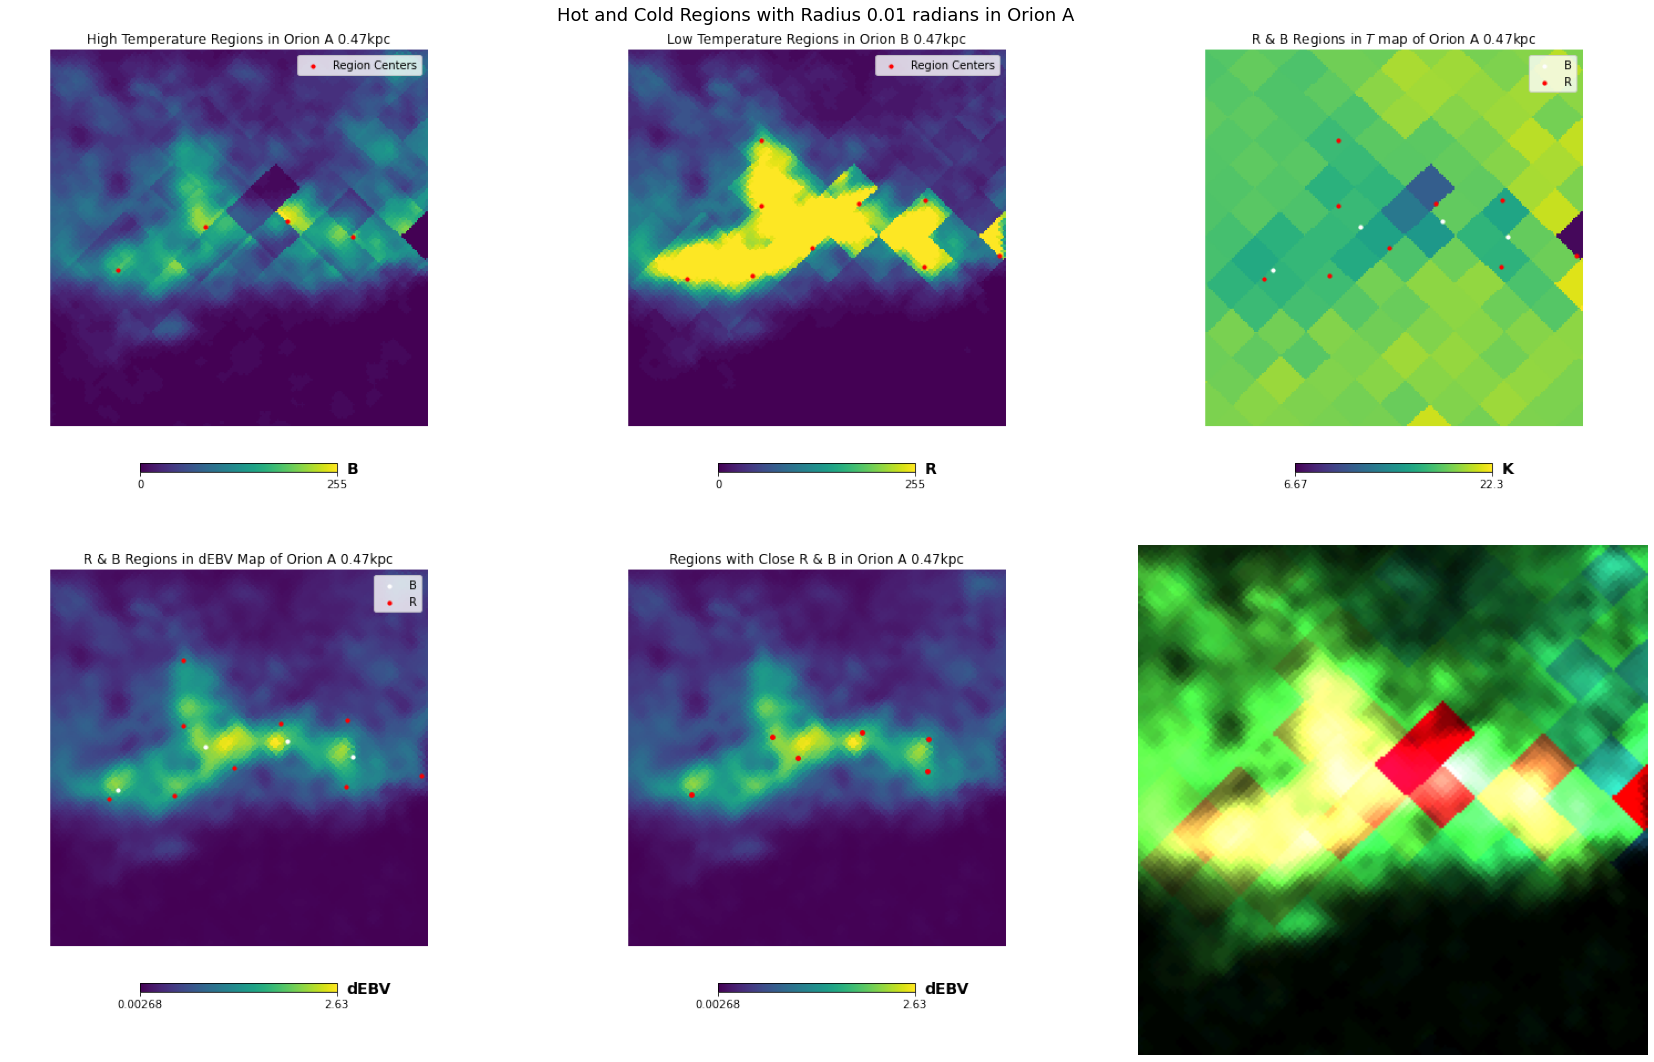

In [22]:
orionA_imgs = ['OrionA_blue', 'OrionA_red', 'OrionA_R&B_temp', 'OrionA_R&B', 'OrionA_bothR&B', 'OrionA_RGB']
orionA_panel_save = temp_path + '/OrionA_panel_gauss.png'
vf.create_panel([2,3], (25,15), temp_path, orionA_imgs, 'Hot and Cold Regions with Radius ' + '{:.2f}'.format(np.radians(0.8)) + ' radians in Orion A', filename = orionA_panel_save)

In [23]:
#Now do same for Orion B
vf.overplot_region_gnomview(blue_region_info, B, d_orion, rot=[l_orionB,b_orionB], title='High Temperature Regions in Orion B ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc', filename=temp_path + '/OrionB_blue.png', unit='B')
vf.overplot_region_gnomview(red_region_info, R, d_orion, rot=[l_orionB,b_orionB], title='Low Temperature Regions in Orion B ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc', filename=temp_path + '/OrionB_red.png', unit='R')

hp.gnomview(Ts_new[d_orion], rot=[l_orionB, b_orionB], xsize=200, ysize=200, nest=True, title='R & B Regions in $T$ map of Orion B ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc', cbar=True, notext=True, unit='K')
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', marker='o', s=10)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', marker='o', s=10)
plt.legend(['B', 'R'])
plt.savefig(temp_path + '/OrionB_R&B_temp.png')
plt.close()

hp.gnomview(dEBV[d_orion], rot=[l_orionB, b_orionB], xsize=200, ysize=200, nest=True, title='R & B Regions in dEBV map of Orion B ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc', cbar=True, notext=True, unit='dEBV')
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', marker='o', s=10)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', marker='o', s=10)
plt.legend(['B', 'R'])
plt.savefig(temp_path + '/OrionB_R&B.png')
plt.close()

hp.gnomview(dEBV[d_orion], rot=[l_orionB, b_orionB], xsize=200, ysize=200, nest=True, title='Regions with Close R & B in Orion B ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc', cbar=True, notext=True, unit='dEBV')
hp.projscatter(close_RandB[d_orion][:,0], close_RandB[d_orion][:,1], c='red', marker='o', s=15)
plt.savefig(temp_path + '/OrionB_bothR&B.png')
plt.close()




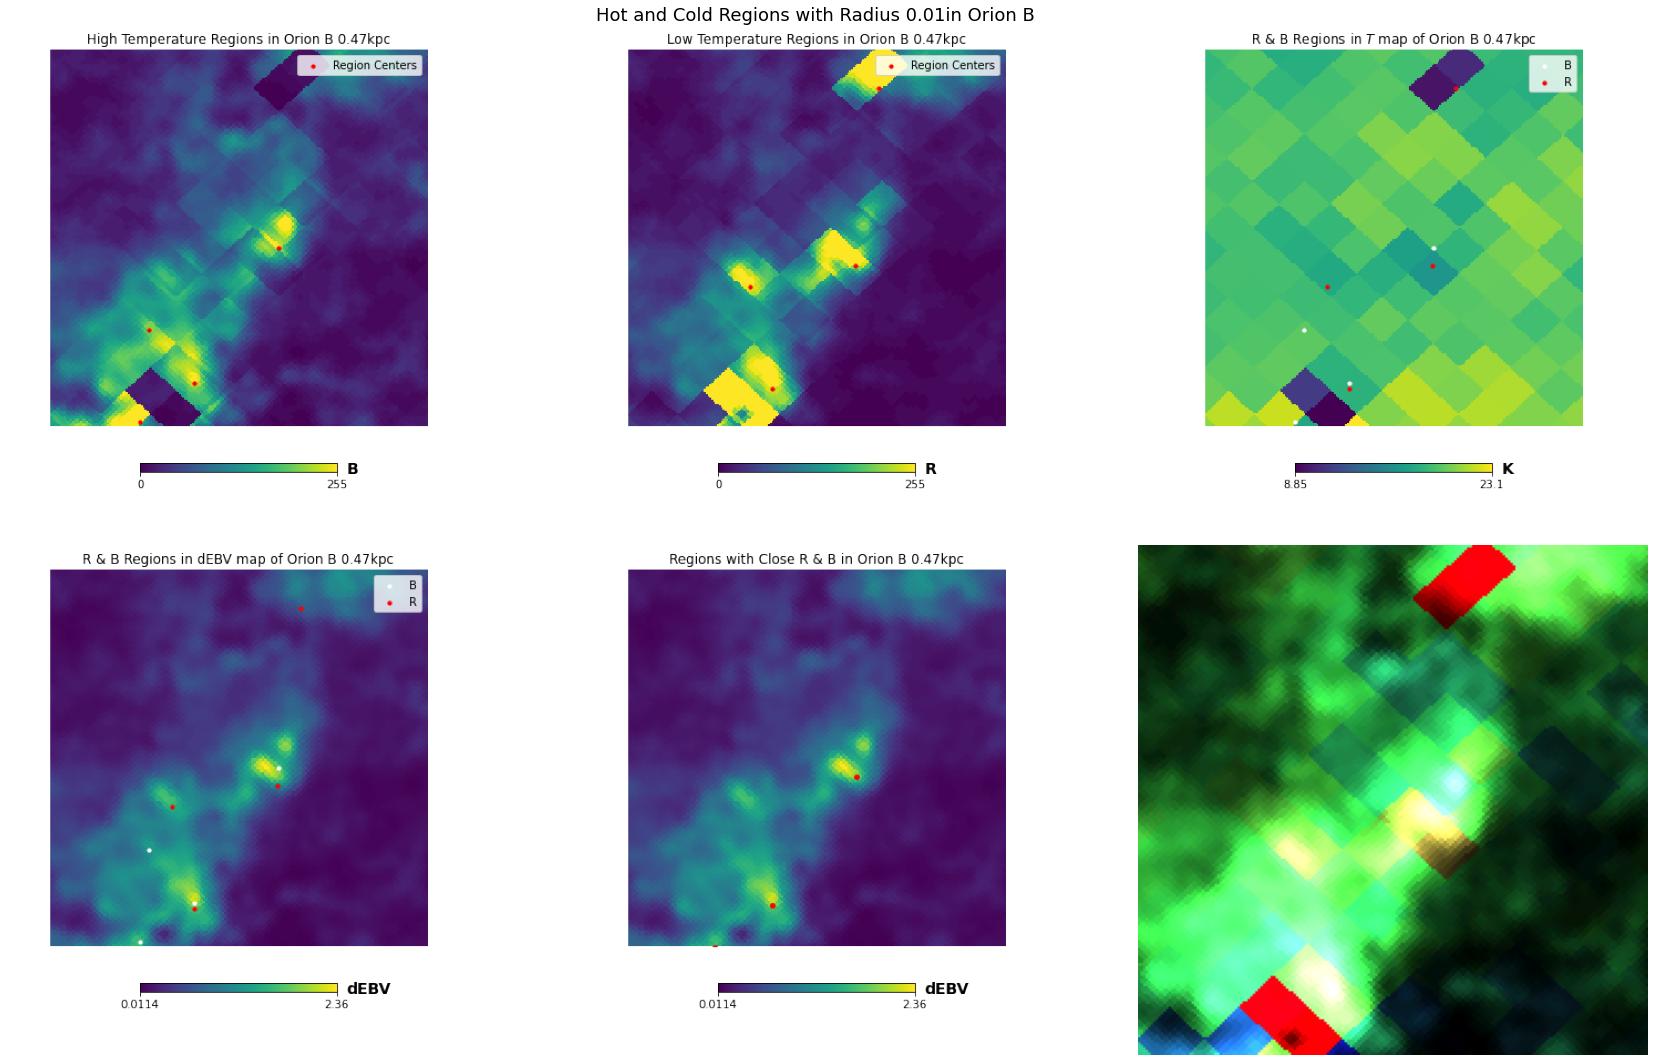

In [24]:
orionB_imgs = ['OrionB_blue', 'OrionB_red', 'OrionB_R&B_temp', 'OrionB_R&B', 'OrionB_bothR&B', 'OrionB_RGB']
orionB_panel_save = temp_path + '/OrionB_panel_gauss.png'
vf.create_panel([2,3], (25,15), temp_path, orionB_imgs, 'Hot and Cold Regions with Radius ' + '{:.2f}'.format(np.radians(0.8)) + 'in Orion B', filename = orionB_panel_save)

In [25]:
#Trying to overplot in image
# RGB_orion_array = np.array(RGB_orion)

# fig = plt.figure()
# hp.gnomview(map=None, rot=[l_orionA, b_orionA], xsize=200, return_projected_map=True, notext=True)
# ax = plt.gca()
# ax.imshow(RGB_orion_array, extent=[206, 217, -15.5, -23.5], aspect='auto')
# plt.axis('off')
# hp.projscatter(blue_centers[:,0], blue_centers[:,1], s=10, marker='o', color='white')
# plt.show()

## Making correlations with YSOs

In [26]:
#Get l and b at each distance slice

KYSOs = pd.read_csv(csv_files_path + '/KYSO_withdist.csv')
l_kysos, b_kysos, d_kysos = ld.load_sftracer(KYSOs)

l_kysos_wdist, b_kysos_wdist = calc.assign_distance_slice(data_dict, l_kysos, b_kysos, d_kysos)

35 objects had distances out of range


In [27]:
#Make new path for images
YSOs_path = sm.join_path(flagged_properties_path, 'YSOs_Correlations')

Directory  /fs/lustre/cita/molinaca/Images/Flagged_Properties/YSOs_Correlations  already exists.


In [28]:
highdEBV_centers = []
for ds_index in range(n_distslices):
    highdEBV_centers_atdist = np.array([region['center'] for region in highdEBV_info[ds_index]])
    highdEBV_centers.append(highdEBV_centers_atdist)

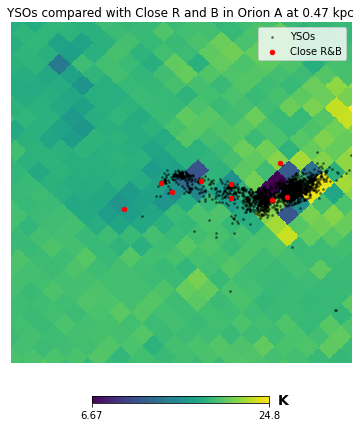

In [29]:
#Make plots to make a panel
hp.gnomview(dEBV[d_orion], rot=[l_orionA, b_orionA], xsize=400, ysize=400, nest=True, title='KYSOs compared to dEBV in Orion A at ' + ' {:.2f}'.format(distslices[d_orion]) + 'kpc', cbar=True, notext=True, unit='dEBV')
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.5, c='black', marker='*', s=10)
hp.projscatter(highdEBV_centers[d_orion][:,0], highdEBV_centers[d_orion][:,1], c='red', marker='s', s=20)
plt.legend(['YSOs', 'High dEBV'])
plt.savefig(YSOs_path + '/OrionA_dens.png')
plt.close()

hp.gnomview(dEBV[d_orion], rot=[l_orionB, b_orionB], xsize=400, ysize=400, nest=True, title='KYSOs compared to dEBV in Orion B at ' + ' {:.2f}'.format(distslices[d_orion]) + 'kpc', cbar=True, notext=True, unit='dEBV')
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.5, c='black', marker='*', s=10)
hp.projscatter(highdEBV_centers[d_orion][:,0], highdEBV_centers[d_orion][:,1], c='red', marker='s', s=20)
plt.legend(['YSOs', 'High dEBV'])
plt.savefig(YSOs_path + '/OrionB_dens.png')
plt.close()

hp.gnomview(dEBV[d_orion], rot=[l_orion_ring, b_orion_ring], xsize=400, ysize=400, nest=True, title='KYSOs compared to dEBV in Orion Ring at ' + ' {:.2f}'.format(distslices[d_orion]) + 'kpc', cbar=True, notext=True, unit='dEBV')
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.5, c='black', marker='*', s=10)
hp.projscatter(highdEBV_centers[d_orion][:,0], highdEBV_centers[d_orion][:,1], c='red', marker='s', s=20)
plt.legend(['YSOs', 'High dEBV'])
plt.savefig(YSOs_path + '/OrionRing_dens.png')
plt.close()

hp.gnomview(Ts_new[d_orion], rot=[l_orionA, b_orionA], xsize=400, ysize=400, nest=True, title='YSOs compared with high B and R in Orion A at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc', cbar=True, notext=True, unit='K')
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', facecolors='none', marker='o', s=15)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', facecolors='none', marker='o', s=15)
plt.legend(['YSOs', 'B', 'R'])
plt.savefig(YSOs_path + '/OrionA_temp.png')
plt.close()

hp.gnomview(Ts_new[d_orion], rot=[l_orionB, b_orionB], xsize=400, ysize=400, nest=True, title='YSOs compared with high B and R in Orion B at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc', cbar=True, notext=True, unit='K')
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', facecolors='none', marker='o', s=15)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', facecolors='none', marker='o', s=15)
plt.legend(['YSOs', 'B', 'R'])
plt.savefig(YSOs_path + '/OrionB_temp.png')
plt.close()

hp.gnomview(Ts_new[d_orion], rot=[l_orion_ring, b_orion_ring], xsize=400, ysize=400, nest=True, title='YSOs compared with high B and R in Orion Ring at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc', cbar=True, notext=True, unit='K')
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', facecolors='none', marker='o', s=15)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', facecolors='none', marker='o', s=15)
plt.legend(['YSOs', 'B', 'R'])
plt.savefig(YSOs_path + '/OrionRing_temp.png')
plt.close()

hp.gnomview(Ts_new[d_orion], rot=[l_orionA, b_orionA], xsize=400, ysize=400, nest=True, title='YSOs compared with Close R and B in Orion A at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc', cbar=True, notext=True, unit='K')
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(close_RandB[d_orion][:,0], close_RandB[d_orion][:,1], c='red', marker='o', s=20)
plt.legend(['YSOs', 'Close R&B'])
plt.savefig(YSOs_path + '/OrionA_bothtemp.png')
plt.show()

hp.gnomview(Ts_new[d_orion], rot=[l_orionB, b_orionB], xsize=400, ysize=400, nest=True, title='YSOs compared with Close R and B in Orion B at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc', cbar=True, notext=True, unit='K')
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(close_RandB[d_orion][:,0], close_RandB[d_orion][:,1], c='red', marker='o', s=20)
plt.legend(['YSOs', 'Close R&B'])
plt.savefig(YSOs_path + '/OrionB_bothtemp.png')
plt.close()

hp.gnomview(Ts_new[d_orion], rot=[l_orion_ring, b_orion_ring], xsize=400, ysize=400, nest=True, title='YSOs compared with Close R and B in Orion Ring at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc', cbar=True, notext=True, unit='K')
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(close_RandB[d_orion][:,0], close_RandB[d_orion][:,1], c='red', marker='o', s=20)
plt.legend(['YSOs', 'Close R&B'])
plt.savefig(YSOs_path + '/OrionRing_bothtemp.png')
plt.close()




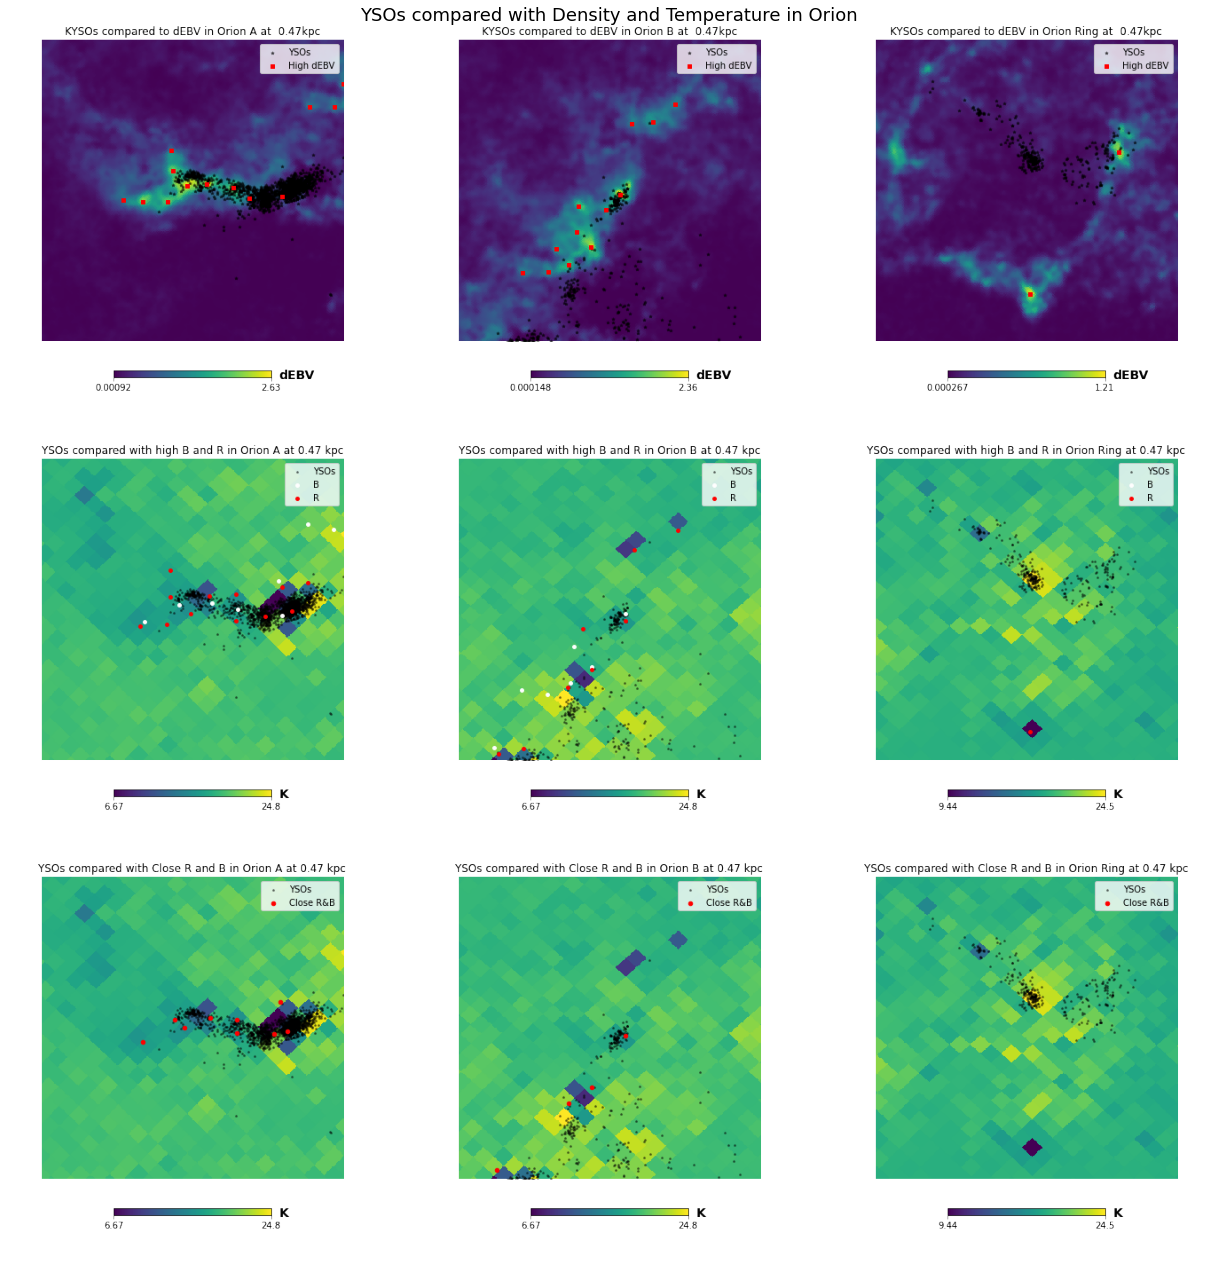

In [30]:
orion_x_ysos_imgs = ['OrionA_dens', 'OrionB_dens', 'OrionRing_dens', 'OrionA_temp', 'OrionB_temp', 'OrionRing_temp', 'OrionA_bothtemp', 'OrionB_bothtemp', 'OrionRing_bothtemp']
orion_x_ysos_panel_save = YSOs_path + '/OrionAndYSOs_panel.png'
vf.create_panel([3,3], (18,18), YSOs_path, orion_x_ysos_imgs, 'YSOs compared with Density and Temperature in Orion', filename = orion_x_ysos_panel_save)

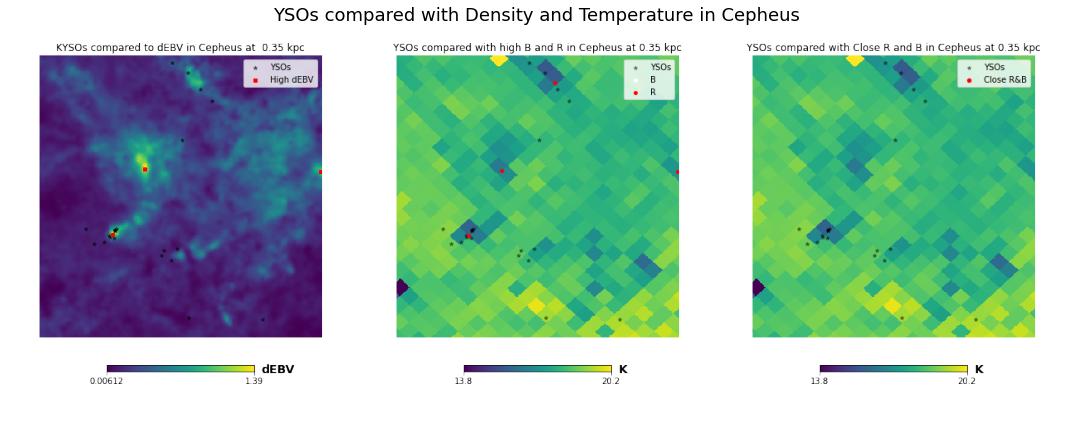

In [34]:
#Now do same thing for cepheus

hp.gnomview(dEBV[d_ceph], rot=[l_ceph, b_ceph], xsize=400, ysize=400, nest=True, title='KYSOs compared to dEBV in Cepheus at ' + ' {:.2f}'.format(distslices[d_ceph]) + ' kpc', cbar=True, notext=True, unit='dEBV')
hp.projscatter(l_kysos_wdist[d_ceph], b_kysos_wdist[d_ceph], lonlat=True, alpha=0.5, c='black', marker='*', s=20)
hp.projscatter(highdEBV_centers[d_ceph][:,0], highdEBV_centers[d_ceph][:,1], c='red', marker='s', s=20)
plt.legend(['YSOs', 'High dEBV'])
plt.savefig(YSOs_path + '/Cepheus_dens.png')
plt.close()

hp.gnomview(Ts_new[d_ceph], rot=[l_ceph, b_ceph], xsize=400, ysize=400, nest=True, title='YSOs compared with high B and R in Cepheus at ' + '{:.2f}'.format(distslices[d_ceph]) + ' kpc', cbar=True, notext=True, unit='K')
hp.projscatter(l_kysos_wdist[d_ceph], b_kysos_wdist[d_ceph], lonlat=True, alpha=0.4, c='black', marker='*', s=20)
hp.projscatter(blue_centers[d_ceph][:,0], blue_centers[d_ceph][:,1], c='white', facecolors='none', marker='o', s=15)
hp.projscatter(red_centers[d_ceph][:,0], red_centers[d_ceph][:,1], c='red', facecolors='none', marker='o', s=15)
plt.legend(['YSOs', 'B', 'R'])
plt.savefig(YSOs_path + '/Cepheus_temp.png')
plt.close()

hp.gnomview(Ts_new[d_ceph], rot=[l_ceph, b_ceph], xsize=400, ysize=400, nest=True, title='YSOs compared with Close R and B in Cepheus at ' + '{:.2f}'.format(distslices[d_ceph]) + ' kpc', cbar=True, notext=True, unit='K')
hp.projscatter(l_kysos_wdist[d_ceph], b_kysos_wdist[d_ceph], lonlat=True, alpha=0.4, c='black', marker='*', s=20)
hp.projscatter(close_RandB[d_ceph][:,0], close_RandB[d_ceph][:,1], c='red', marker='o', s=20)
plt.legend(['YSOs', 'Close R&B'])
plt.savefig(YSOs_path + '/Cepheus_bothtemp.png')
plt.close()

ceph_x_ysos = ['Cepheus_dens', 'Cepheus_temp', 'Cepheus_bothtemp']
ceph_x_ysos_panel_save = YSOs_path + '/CepheusAndYSOs_panel.png'
vf.create_panel([1,3], (15,6), YSOs_path, ceph_x_ysos, 'YSOs compared with Density and Temperature in Cepheus', filename = ceph_x_ysos_panel_save)


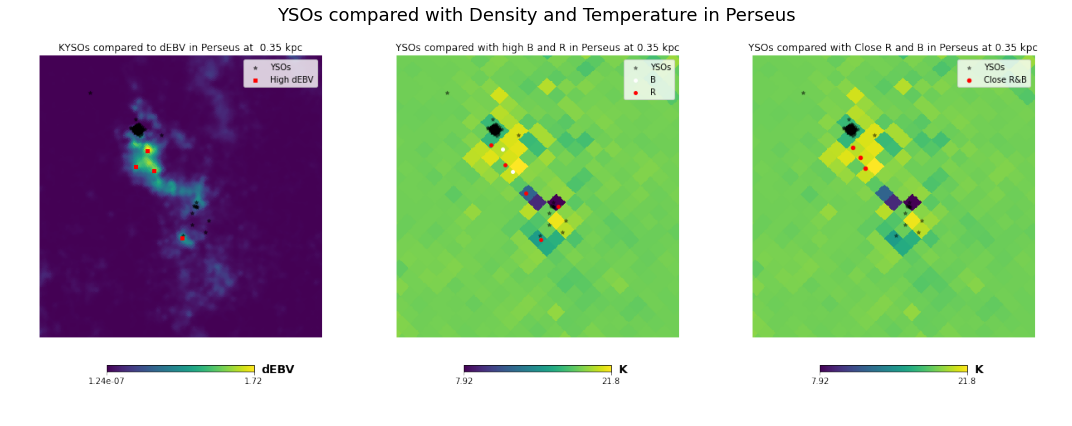

In [35]:
#Perseus
hp.gnomview(dEBV[d_perseus], rot=[l_perseus, b_perseus], xsize=400, ysize=400, nest=True, title='KYSOs compared to dEBV in Perseus at ' + ' {:.2f}'.format(distslices[d_perseus]) + ' kpc', cbar=True, notext=True, unit='dEBV')
hp.projscatter(l_kysos_wdist[d_perseus], b_kysos_wdist[d_perseus], lonlat=True, alpha=0.5, c='black', marker='*', s=20)
hp.projscatter(highdEBV_centers[d_perseus][:,0], highdEBV_centers[d_perseus][:,1], c='red', marker='s', s=20)
plt.legend(['YSOs', 'High dEBV'])
plt.savefig(YSOs_path + '/Perseus_dens.png')
plt.close()

hp.gnomview(Ts_new[d_perseus], rot=[l_perseus, b_perseus], xsize=400, ysize=400, nest=True, title='YSOs compared with high B and R in Perseus at ' + '{:.2f}'.format(distslices[d_perseus]) + ' kpc', cbar=True, notext=True, unit='K')
hp.projscatter(l_kysos_wdist[d_perseus], b_kysos_wdist[d_perseus], lonlat=True, alpha=0.4, c='black', marker='*', s=20)
hp.projscatter(blue_centers[d_perseus][:,0], blue_centers[d_perseus][:,1], c='white', facecolors='none', marker='o', s=15)
hp.projscatter(red_centers[d_perseus][:,0], red_centers[d_perseus][:,1], c='red', facecolors='none', marker='o', s=15)
plt.legend(['YSOs', 'B', 'R'])
plt.savefig(YSOs_path + '/Perseus_temp.png')
plt.close()

hp.gnomview(Ts_new[d_perseus], rot=[l_perseus, b_perseus], xsize=400, ysize=400, nest=True, title='YSOs compared with Close R and B in Perseus at ' + '{:.2f}'.format(distslices[d_perseus]) + ' kpc', cbar=True, notext=True, unit='K')
hp.projscatter(l_kysos_wdist[d_perseus], b_kysos_wdist[d_perseus], lonlat=True, alpha=0.4, c='black', marker='*', s=20)
hp.projscatter(close_RandB[d_perseus][:,0], close_RandB[d_perseus][:,1], c='red', marker='o', s=20)
plt.legend(['YSOs', 'Close R&B'])
plt.savefig(YSOs_path + '/Perseus_bothtemp.png')
plt.close()

perseus_x_ysos = ['Perseus_dens', 'Perseus_temp', 'Perseus_bothtemp']
perseus_x_ysos_panel_save = YSOs_path + '/PerseusAndYSOs_panel.png'
vf.create_panel([1,3], (15,6), YSOs_path, perseus_x_ysos, 'YSOs compared with Density and Temperature in Perseus', filename = perseus_x_ysos_panel_save)